In [ ]:
#TASK 3

In [2]:
import pandas as pd
#import pandas

In [3]:
df_south_korea = pd.read_csv('South_Korea_Territory.csv')
df_vertiport = pd.read_csv('Vertiport_candidates.csv')
#Check each label with header file

In [4]:
import matplotlib.pyplot as plt
#import matplotlib

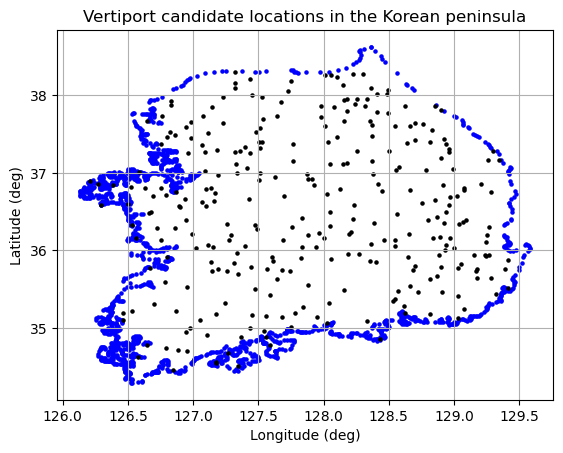

In [5]:
# Plotting South Korea data points in blue
plt.scatter(df_south_korea['Longitude (deg)'], df_south_korea['Latitude (deg)'], marker='.', color='blue', s=20)

# Plotting Vertiport data points in black
plt.scatter(df_vertiport['Longitude (deg)'], df_vertiport['Latitude (deg)'], marker='.', color='black', s=20)
plt.title('Vertiport candidate locations in the Korean peninsula')
# Setting the axis labels
plt.xlabel('Longitude (deg)', fontsize=10)
plt.ylabel('Latitude (deg)', fontsize=10)

# Enabling the grid
plt.grid(True)

# Display the plot
plt.show()
#Graph 'Vertiport_candidates.csv' file

In [6]:
number_of_cluster = 17
#Set the number of clusters

In [7]:
#importing modules for plotting
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Implementation of K-means algorithm

def k_means_with_iterations(points, k, max_iters=100):
    # Set the random seed for reproducibility (optional)
    np.random.seed(42)

    # Step 1: Initialize centroids
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    for iteration in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)

        # Step 3: Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i] 
                                  for i, cluster in enumerate(clusters)])

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            return clusters, centroids, iteration + 1

        centroids = new_centroids

    return clusters, centroids, iteration + 1

In [9]:
import pandas as pd

# Load the dataset
file_path = 'Vertiport_candidates.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
# Extract the points from the dataset
points = data.values

C:\Users\asmao\AppData\Local\Temp\ipykernel_34316\4241741938.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)


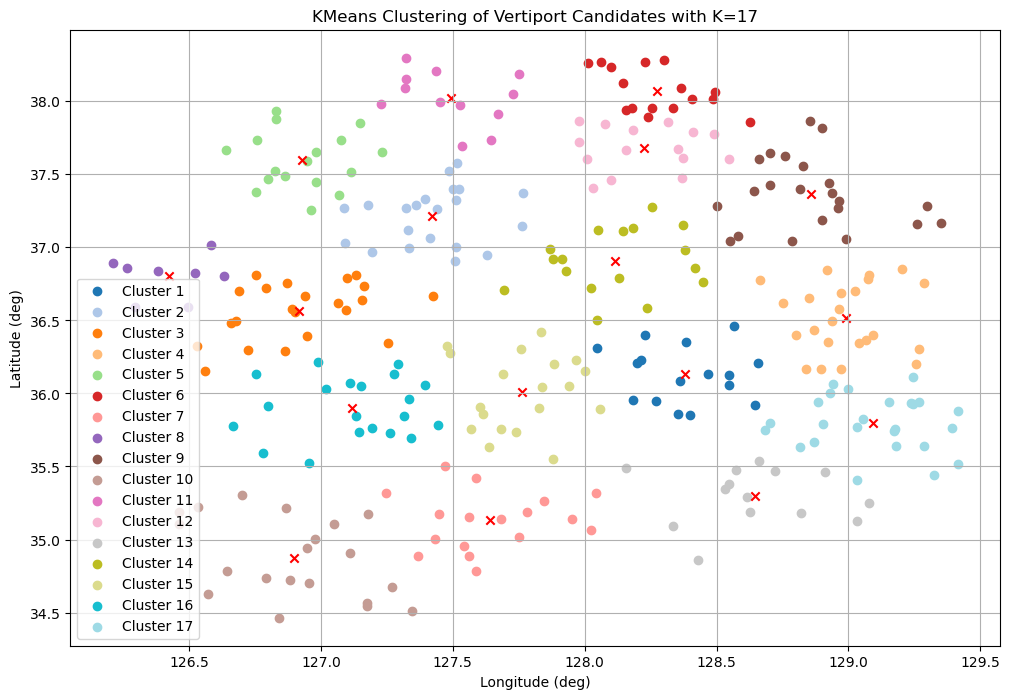

In [10]:
# Run the clustering algorithm with K=17
k=17
clusters, centroids, iterations = k_means_with_iterations(points, k)

# Display the number of iterations for convergence
#print("Iterations for convergence:", iterations)

# Plotting the results
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab20', k)
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors(i), label=f'Cluster {i+1}')
    plt.scatter(centroids[i][0], centroids[i][1], color='red', marker='x')

plt.title('KMeans Clustering of Vertiport Candidates with K=17')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.grid(True)
plt.show()
